# Make the imports to run detoxify

In [279]:
# !pip install detoxify
# !pip install langchain
# !pip install datasets

In [280]:
import pandas as pd
import numpy as np
from detoxify import Detoxify

# Download list of tweets to pass throught detoxify

In [ ]:
#Create list of tweets 
ar_translated = pd.read_csv("/Users/margueritethery/Documents/EPFL/deep_learning/deeplearning/detoxify/dataset/ar_dataset_600_translated.csv")
l = ar_translated['tweet'].tolist()

In [ ]:
#Run the detoxify model for multilingual classification 
results = Detoxify('multilingual').predict(l)
model = Detoxify('original')
print(pd.DataFrame(results).round(5))

In [ ]:
# Save results 
results = pd.DataFrame(results)
results.to_csv("ar_dataset_600_translated_pred.csv")

# Compute Detoxify results

In [284]:
import pandas as pd
import numpy as np

# Datasets
ar = pd.read_csv("/Users/margueritethery/Documents/EPFL/deep_learning/deeplearning/detoxify/dataset/ar_dataset_600.csv")
fr = pd.read_csv("/Users/margueritethery/Documents/EPFL/deep_learning/deeplearning/detoxify/dataset/fr_dataset_600.csv")
en = pd.read_csv("/Users/margueritethery/Documents/EPFL/deep_learning/deeplearning/detoxify/dataset/en_dataset_600.csv")

# Predictions
ar_pred = pd.read_csv("/Users/margueritethery/Documents/EPFL/deep_learning/deeplearning/detoxify/dataset/ar_dataset_600_translated_detoxify_pred.csv")
fr_pred = pd.read_csv("/Users/margueritethery/Documents/EPFL/deep_learning/deeplearning/detoxify/dataset/fr_dataset_600_translated_detoxify_pred.csv")
en_pred = pd.read_csv("/Users/margueritethery/Documents/EPFL/deep_learning/deeplearning/detoxify/dataset/en_dataset_600_detoxify_pred.csv")

# Take the maximum value out of all the cateogires (toxicity, sexually explicit, ..)
ar_pred["max_pred"] = ar_pred.iloc[:, 2:].max(axis=1)
fr_pred["max_pred"] = fr_pred.iloc[:, 2:].max(axis=1)
en_pred["max_pred"] = en_pred.iloc[:, 2:].max(axis=1)

# Classifiy into normal if max of all categories is below 0.5 and hateful otherwise
ar_pred["pred"] = np.where(ar_pred["max_pred"] < 0.5, 0, 1)
fr_pred["pred"] = np.where(fr_pred["max_pred"] < 0.5, 0, 1)
en_pred["pred"] = np.where(en_pred["max_pred"] < 0.5, 0, 1)

# Final datasets with predictions
ar = pd.concat([ar, ar_pred], axis=1).drop(['Unnamed: 0'], axis =1)
fr = pd.concat([fr, fr_pred], axis=1).drop(['Unnamed: 0'], axis =1)
en = pd.concat([en, en_pred], axis=1).drop(['Unnamed: 0'], axis =1)

# Take only sentiment normal and hateful
ar = ar[ar["sentiment"] != "offensive"]
fr = fr[fr["sentiment"] != "offensive"]
en = en[en["sentiment"] != "offensive"]

# Label column normal 0 hateful 1 
ar["label"] = np.where(ar["sentiment"] == "normal", 0, 1)
fr["label"] = np.where(fr["sentiment"] == "normal", 0, 1)
en["label"] = np.where(en["sentiment"] == "normal", 0, 1)

In [285]:
#Compute metrics between label and pred
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

used_data = fr
acc = accuracy_score(used_data['label'], used_data['pred'])
F1 = f1_score(used_data['label'], used_data['pred'], average='macro')
Precision = precision_score(used_data['label'], used_data['pred'], average='macro')
Recall = recall_score(used_data['label'], used_data['pred'], average='macro')

print(f"Accuracy: {acc:.3f}, F1: {F1:.3f}, Precision: {Precision:.3f}, Recall: {Recall:.3f}")

Accuracy: 0.575, F1: 0.512, Precision: 0.656, Recall: 0.575


# Analuze Detoxify results

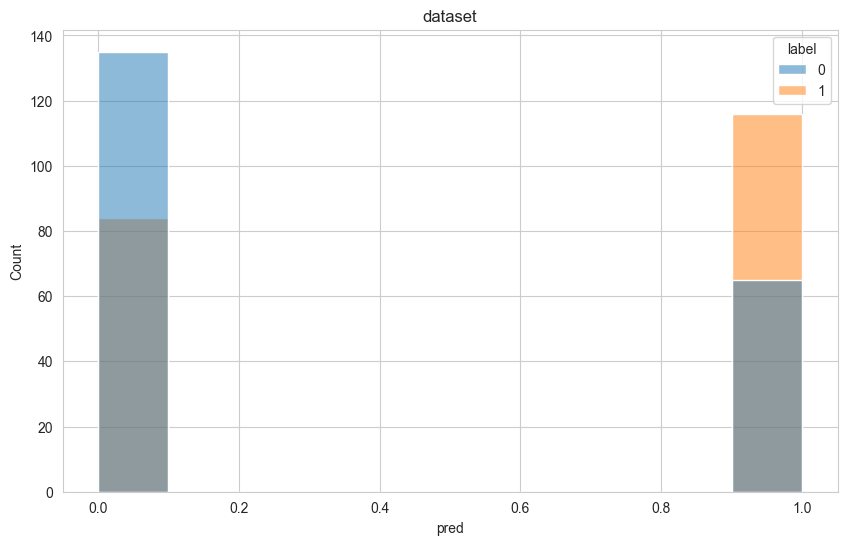

In [283]:
# Plot 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data=en, x="pred", hue="label")
plt.title("dataset")
plt.show()

In [301]:
ar.iloc[:, 8:15]

,toxicity,severe_toxicity,obscene,identity_attack,insult,threat,sexual_explicit
0,0.105544,0.000083,0.001414,0.000269,0.056335,0.000968,0.001215
1,0.022527,0.000271,0.000588,0.019731,0.003022,0.001272,0.000503
2,0.676421,0.001521,0.020238,0.056764,0.497943,0.001365,0.001024
3,0.001003,0.000032,0.000217,0.000137,0.000572,0.000043,0.000036
4,0.001794,0.000029,0.000326,0.000065,0.000456,0.000110,0.000070
...,...,...,...,...,...,...,...
595,0.008020,0.000277,0.001916,0.010536,0.002427,0.000242,0.000204
596,0.090407,0.000181,0.003075,0.000683,0.034068,0.001465,0.001204
597,0.000905,0.000090,0.000905,0.000246,0.002423,0.000051,0.000039
598,0.647976,0.000089,0.001630,0.062333,0.531758,0.000645,0.000285


In [317]:
# Run a logistic regression to see which category helps the most the predictions 
# import OLS with stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Play with the X to remove categories with a high correlation 
X = ar.iloc[:, 8:9]
y = ar['label']
X['cst'] = np.ones(len(X))
# Write Logisitic Regression with sm
model = sm.Logit(y, X)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.561205
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  label   No. Observations:                  400
Model:                          Logit   Df Residuals:                      398
Method:                           MLE   Df Model:                            1
Date:                Sat, 25 May 2024   Pseudo R-squ.:                  0.1904
Time:                        17:33:40   Log-Likelihood:                -224.48
converged:                       True   LL-Null:                       -277.26
Covariance Type:            nonrobust   LLR p-value:                 9.237e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
toxicity       3.2685      0.382      8.554      0.000       2.520       4.017
cst           -0.8135      0.136     -6.002      0.000      -1.079      -0.548
==============================================================================
"""

In [320]:
# One hot encoding for sentiment column: create normal, hate, offensive columns and classify sentiment in each
ar = pd.get_dummies(ar, columns=['sentiment', 'directness', 'annotator_sentiment', 'target', 'group'])
fr = pd.get_dummies(fr, columns=['sentiment', 'directness', 'annotator_sentiment', 'target', 'group'])
en = pd.get_dummies(en, columns=['sentiment', 'directness', 'annotator_sentiment', 'target', 'group'])
ar = ar.drop(columns=['tweet', 'sentiment_binary'], axis=1).astype(float)
fr = fr.drop(columns=['tweet', 'sentiment_binary'], axis=1).astype(float)
en = en.drop(columns=['tweet', 'sentiment_binary'], axis=1).astype(float)

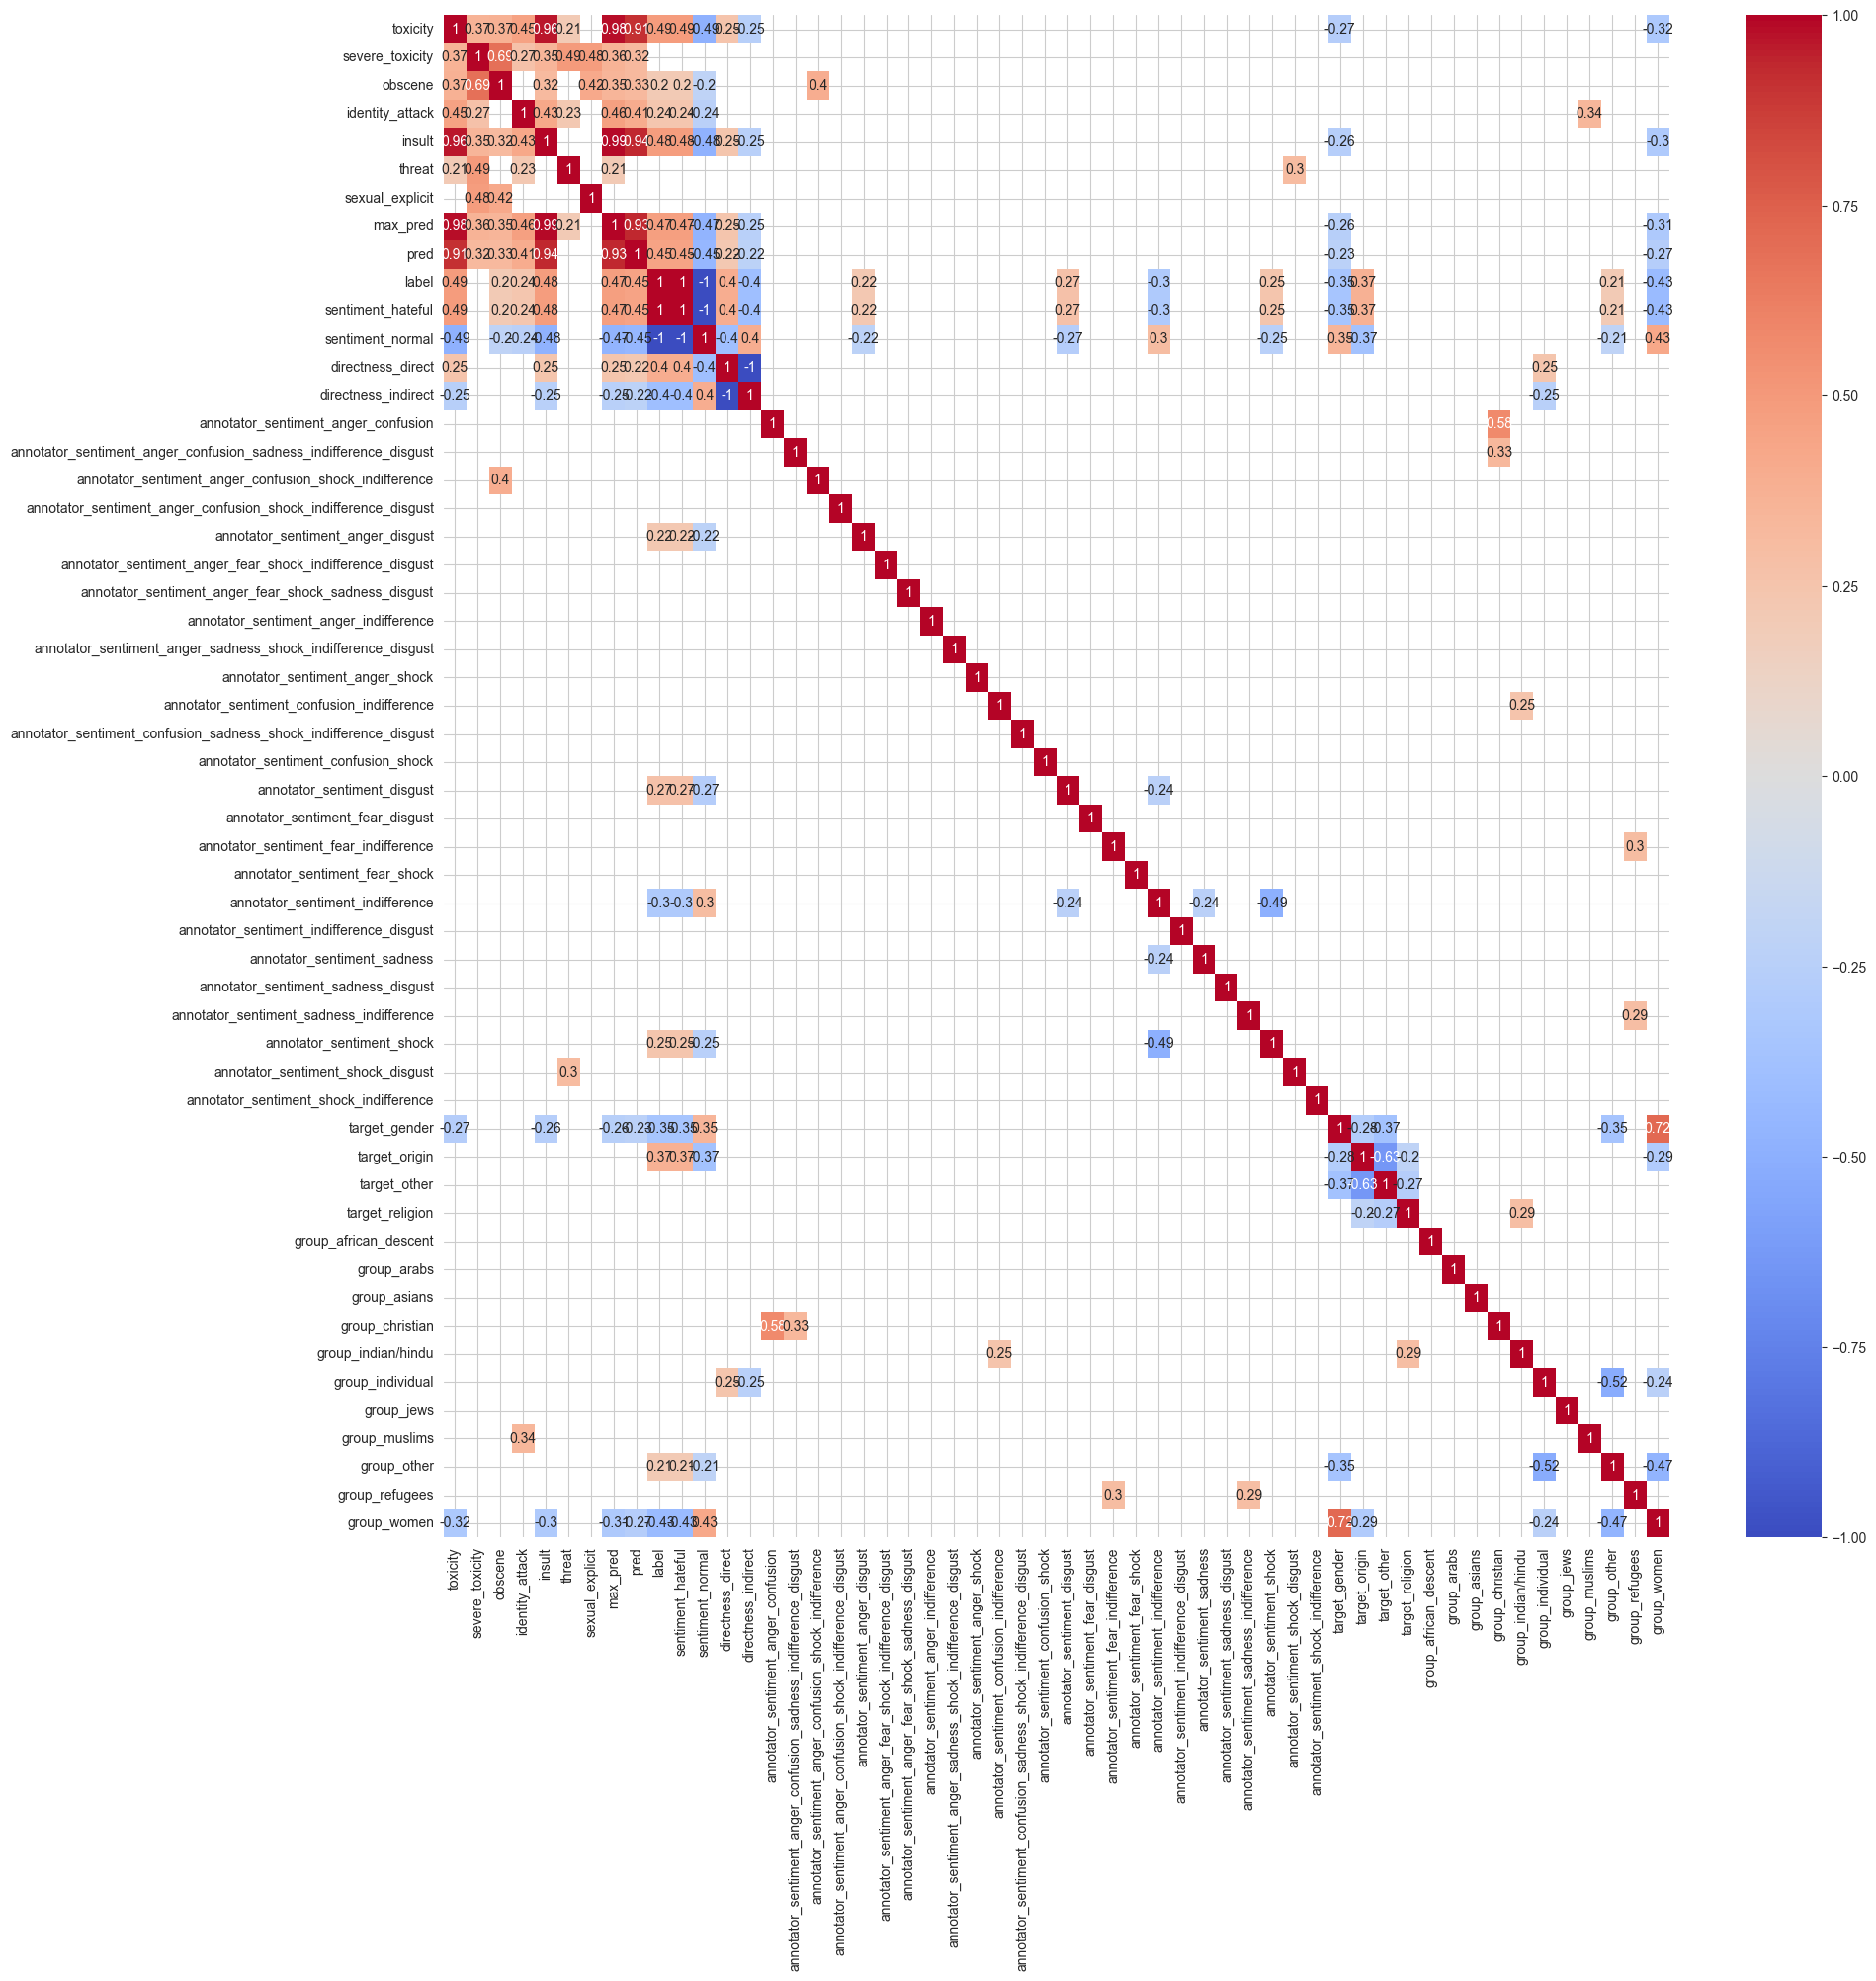

In [321]:
# Correlation matrices
data = ar.drop(['HITId'], axis = 1)
correlation = data.corr()
plt.figure(figsize=(20,20))

# Show only strong correlations 
sns.heatmap(correlation[(correlation >= 0.2) | (correlation <= -0.2)], annot=True, cmap='coolwarm')
plt.show()

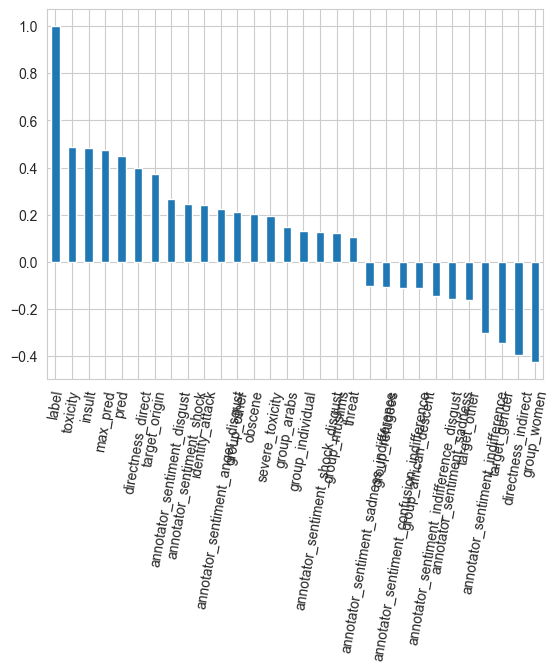

In [323]:
# Study correlation of sentiment hateful with other variables 
correlation = data.corr()
correlation = correlation['sentiment_hateful']
correlation = correlation.sort_values(ascending=False)
correlation = correlation.drop(['sentiment_hateful', 'sentiment_normal'])
correlation = correlation.dropna()
correlation = correlation[(correlation >= 0.1) | (correlation <= -0.1)]
correlation.plot(kind='bar')
plt.xticks(rotation=80)
plt.show()

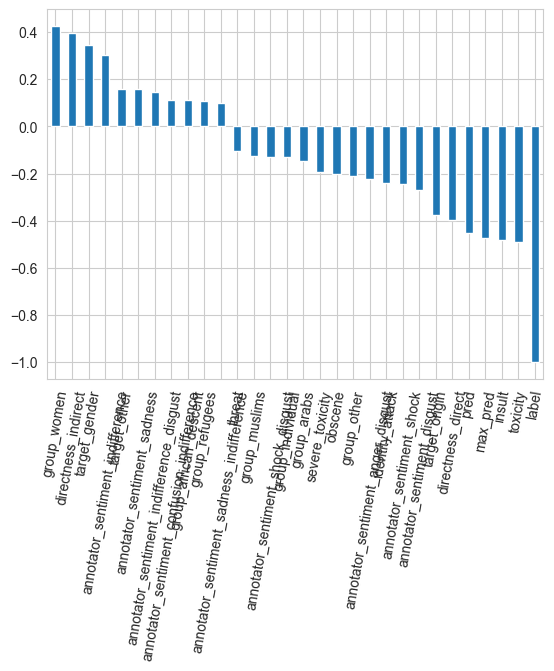

group_women                                   0.425291
directness_indirect                           0.396435
target_gender                                 0.345834
annotator_sentiment_indifference              0.302568
target_other                                  0.160652
annotator_sentiment_sadness                   0.156772
annotator_sentiment_indifference_disgust      0.146553
annotator_sentiment_confusion_indifference    0.112509
group_african_descent                         0.112509
group_refugees                                0.107011
annotator_sentiment_sadness_indifference      0.100504
threat                                       -0.106242
group_muslims                                -0.123404
annotator_sentiment_shock_disgust            -0.128103
group_individual                             -0.129464
group_arabs                                  -0.146553
severe_toxicity                              -0.193673
obscene                                      -0.203294
group_othe

In [326]:
correlation = data.corr()
correlation = correlation['sentiment_normal']
correlation = correlation.sort_values(ascending=False)
correlation = correlation.drop(['sentiment_hateful', 'sentiment_normal'])
correlation = correlation.dropna()
correlation = correlation[(correlation >= 0.1) | (correlation <= -0.1)]
correlation.plot(kind='bar')
plt.xticks(rotation=80)
plt.show()
print(correlation)

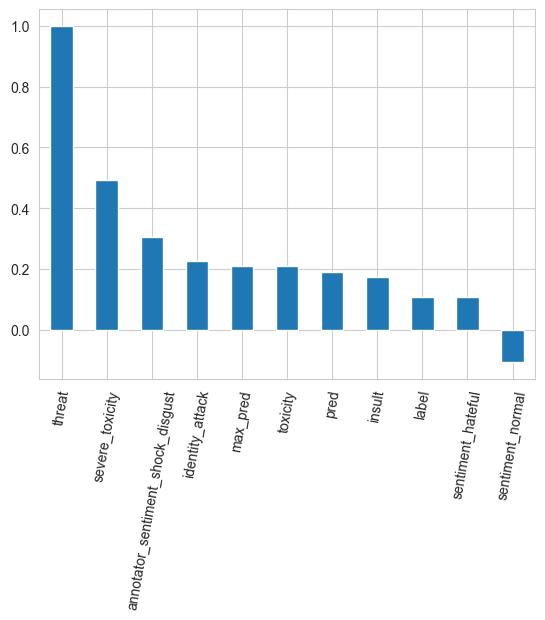

threat                               1.000000
severe_toxicity                      0.494140
annotator_sentiment_shock_disgust    0.304866
identity_attack                      0.226047
max_pred                             0.208909
toxicity                             0.208191
pred                                 0.188432
insult                               0.171987
label                                0.106242
sentiment_hateful                    0.106242
sentiment_normal                    -0.106242
Name: threat, dtype: float64


In [327]:
correlation = data.corr()
correlation = correlation['threat']
correlation = correlation.sort_values(ascending=False)
correlation = correlation.dropna()
correlation = correlation[(correlation >= 0.1) | (correlation <= -0.1)]
correlation.plot(kind='bar')
plt.xticks(rotation=80)
plt.show()
print(correlation)